#### This dataset comprises of forest fires in Algeria.The data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria are considered.If user can predict the forest fire in Algerian region based on input features.Prediction results can be used to give forest fire dates and for making preventive actions.

#### EDA analys is already done
#### the cleaned data file is loaded

In [104]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
import os

In [105]:

df=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\cleaned_data_algerian_fire.csv")

In [106]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [107]:
df.shape

(243, 15)

In [108]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


<AxesSubplot:xlabel='RH', ylabel='Temperature'>

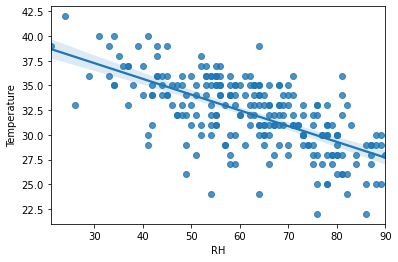

In [137]:
sns.regplot(x='RH',y='Temperature',data=df)  #####   Shifting of line is due to  lasso and Ridge

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

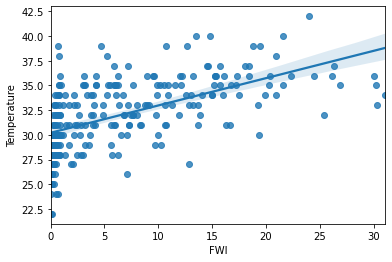

In [139]:
sns.regplot(x='FWI',y='Temperature',data=df)    ### Tempuratue increases with increse in FWI

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

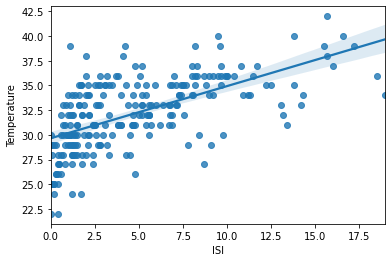

In [142]:
sns.regplot(x='ISI',y='Temperature',data=df)   ### Tempuratue increases with increse in ISI

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

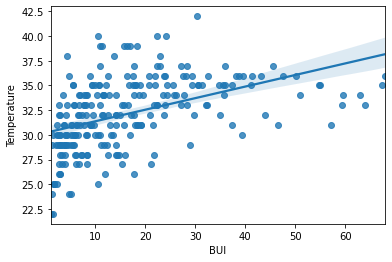

In [143]:
sns.regplot(x='BUI',y='Temperature',data=df)   ### Tempuratue increases with increse in BUI

In [144]:
X=df.iloc[:,4:13]
Y=df['Temperature']

In [146]:
##importing library
from sklearn.model_selection import train_test_split

In [147]:
##sepaerating training and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(
X,Y,test_size=0.33,random_state=42)

In [148]:
X_train.shape

(162, 9)

In [149]:
Y_train.shape

(162,)

In [150]:
##  ### Standardize or feature scaling our features  X-mean/std devi
from sklearn.preprocessing import StandardScaler

In [152]:
scaler=StandardScaler()

In [153]:
scaler.fit_transform(X_train)

array([[ 1.2199876 , -0.22762867, -0.38447658, ..., -0.11433646,
        -0.20093835, -0.19543585],
       [ 0.1473255 , -0.98795537, -0.38447658, ...,  0.09352209,
        -0.38763567, -0.14405961],
       [ 0.34844965, -0.22762867, -0.38447658, ...,  0.09352209,
         0.43916677,  0.24126219],
       ...,
       [ 0.88478069,  0.53269803,  2.84413018, ..., -1.06124763,
        -1.03440854, -0.91470322],
       [-0.25492278,  0.15253468, -0.38447658, ...,  0.60162077,
         0.14578526,  0.47245527],
       [ 0.95182207,  2.05335143,  0.42267511, ..., -0.85338908,
        -0.99440197, -0.8890151 ]])

In [154]:
X_train=scaler.fit_transform(X_train)

In [155]:
X_train

array([[ 1.2199876 , -0.22762867, -0.38447658, ..., -0.11433646,
        -0.20093835, -0.19543585],
       [ 0.1473255 , -0.98795537, -0.38447658, ...,  0.09352209,
        -0.38763567, -0.14405961],
       [ 0.34844965, -0.22762867, -0.38447658, ...,  0.09352209,
         0.43916677,  0.24126219],
       ...,
       [ 0.88478069,  0.53269803,  2.84413018, ..., -1.06124763,
        -1.03440854, -0.91470322],
       [-0.25492278,  0.15253468, -0.38447658, ...,  0.60162077,
         0.14578526,  0.47245527],
       [ 0.95182207,  2.05335143,  0.42267511, ..., -0.85338908,
        -0.99440197, -0.8890151 ]])

In [156]:
X_test=scaler.transform(X_test)  ## not used fit_transform to avoid dataleakage we want scecrecy,test data and train data,we are using mean ,std deviation of traing data,we are test data as real word 

In [157]:
X_test

array([[ 8.02841227e-02, -2.27628673e-01, -3.84476576e-01,
         6.43451873e-01, -7.48542807e-02,  2.55829244e-01,
         2.08999063e-01,  6.57721173e-02,  1.51353770e-01],
       [-5.90129685e-01, -9.87955373e-01, -3.84476576e-01,
         7.49493788e-01, -4.04459160e-01, -4.13146248e-01,
         3.70666824e-01, -4.27642239e-01, -2.77495126e-03],
       [-3.21964162e-01,  9.12861378e-01,  6.02042154e-01,
        -9.82524172e-01, -9.18029554e-01, -8.55112039e-01,
        -8.30293687e-01, -9.34392119e-01, -8.63326980e-01],
       [-3.21964162e-01, -9.87955373e-01, -2.94793055e-01,
         1.34450676e-01,  2.70081058e-01,  7.41991614e-01,
        -6.22435137e-01,  4.72505573e-01, -4.39472995e-01],
       [ 1.47325503e-01, -6.07792023e-01, -3.84476576e-01,
         5.51548879e-01,  6.31198549e-02, -1.31895290e-01,
        -6.81456700e-02, -2.75765448e-02, -9.26833721e-02],
       [ 8.02841227e-02, -2.50860877e+00,  1.53624550e-01,
        -2.68508604e-01, -2.66485025e-01, -7.064508

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
regression=LinearRegression()

In [160]:
regression.fit(X_train,Y_train)  

LinearRegression()

In [161]:
print(regression.coef_)

[-1.19956726 -0.68175957  0.29371512  1.46335032  2.93587369  2.09626414
  0.39309273 -4.24111861 -0.46705925]


In [162]:
print(regression.coef_)

[-1.19956726 -0.68175957  0.29371512  1.46335032  2.93587369  2.09626414
  0.39309273 -4.24111861 -0.46705925]


In [163]:
reg_pred=regression.predict(X_test)

In [164]:
reg_pred

array([33.03535661, 34.3712384 , 30.15363367, 33.5736617 , 33.07287026,
       32.82970664, 31.1715049 , 35.65586898, 31.07768369, 32.09276387,
       28.67721933, 38.98241096, 34.80478265, 34.46680535, 33.90633256,
       32.77597639, 34.01577643, 25.76034007, 32.27866274, 34.32162647,
       30.33292716, 28.56025573, 34.13718049, 28.49580266, 36.0510192 ,
       34.28253395, 32.92448639, 33.30918137, 26.20272003, 32.90929459,
       30.24867998, 32.20123039, 32.44082208, 33.18708207, 32.41943151,
       32.29123764, 31.04610553, 34.73075657, 26.58661576, 22.86445937,
       34.29395542, 34.07751878, 34.90304372, 25.13684078, 36.38899565,
       32.32273061, 30.79592221, 30.4484478 , 33.9090622 , 29.70467098,
       36.90506413, 35.01402084, 33.43678531, 34.29867241, 33.65287314,
       32.06410852, 32.28085093, 33.44613484, 32.13835808, 36.74351469,
       32.78031538, 30.07828075, 29.41550901, 36.63427574, 31.48366456,
       33.23605844, 32.97224937, 33.99018664, 35.46443326, 24.96

In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [166]:
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

6.633042840663093
2.0547618067799536
2.5754694408326984


In [167]:
##r2
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.48316714078202283


In [168]:
## adjusted r2

In [172]:
###N no of datapoints
N=len(Y_test)
P=X_test.shape[1]
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4176531163741102

Text(0, 0.5, 'Predicated data')

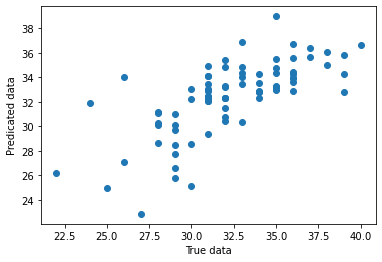

In [173]:
###  Assumptions



plt.scatter(Y_test,reg_pred)
plt.xlabel('True data')
plt.ylabel('Predicated data')

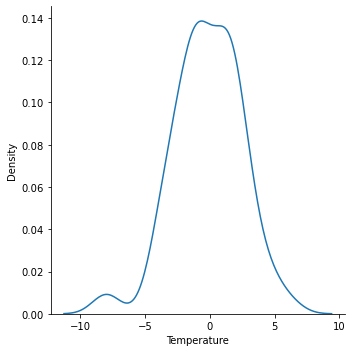

In [174]:
# residuals
residuals=Y_test-reg_pred
sns.displot(residuals,kind='kde')

In [175]:
## Gaussian Distribution but  skewed so use Ridge and Lasso

In [176]:
### Scatter plot residuals and  residual
## We must get uniform distribution  if linear plot you get then not LR 

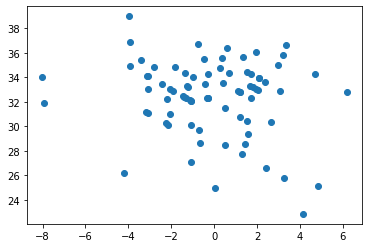

In [177]:
plt.scatter(residuals,reg_pred)   ### uniformly distributed

##this is uniformly distributed

### Ridge  

In [178]:
##importing library
from sklearn.linear_model import Ridge
ridge=Ridge()

In [179]:
ridge.fit(X_train,Y_train)

Ridge()

In [180]:
ridge.predict(X_test)

array([33.10577235, 34.32189707, 30.12462547, 33.64602015, 32.96333555,
       32.96703398, 31.11702116, 35.61932372, 31.12308614, 32.11364468,
       28.68234382, 34.88615859, 34.77734839, 34.37390196, 34.1184234 ,
       32.82223579, 33.95365092, 25.90695024, 32.21726021, 34.27292622,
       30.32515134, 28.47271742, 34.12849835, 28.52795025, 36.19812952,
       34.50560644, 32.95102357, 33.40539026, 26.17524138, 32.7791927 ,
       30.263229  , 32.14225669, 32.42817635, 33.36523777, 32.40469503,
       32.25140795, 30.96916886, 34.71272874, 26.66685811, 22.89097302,
       34.24279975, 33.9903038 , 34.91647256, 25.23479807, 36.14440498,
       32.27407158, 30.76166152, 30.55974847, 33.69411873, 29.67357148,
       36.57299147, 34.92833179, 33.59785807, 34.5697177 , 33.64029417,
       32.33602408, 32.29655316, 33.2870154 , 32.08318574, 36.69569138,
       32.70088267, 29.87328767, 29.42759879, 36.65726634, 31.52166253,
       33.29469739, 33.0155367 , 33.89365623, 35.32838284, 25.00

In [181]:
print(ridge.coef_)

[-1.20384562 -0.68591763  0.262933    1.40183793  0.37230444  0.71995678
  0.39971298 -0.43062127 -0.42903298]


In [182]:
print(ridge.intercept_)

32.098765432098766


In [183]:
rig_pred=ridge.predict(X_test)

In [184]:
rig_pred

array([33.10577235, 34.32189707, 30.12462547, 33.64602015, 32.96333555,
       32.96703398, 31.11702116, 35.61932372, 31.12308614, 32.11364468,
       28.68234382, 34.88615859, 34.77734839, 34.37390196, 34.1184234 ,
       32.82223579, 33.95365092, 25.90695024, 32.21726021, 34.27292622,
       30.32515134, 28.47271742, 34.12849835, 28.52795025, 36.19812952,
       34.50560644, 32.95102357, 33.40539026, 26.17524138, 32.7791927 ,
       30.263229  , 32.14225669, 32.42817635, 33.36523777, 32.40469503,
       32.25140795, 30.96916886, 34.71272874, 26.66685811, 22.89097302,
       34.24279975, 33.9903038 , 34.91647256, 25.23479807, 36.14440498,
       32.27407158, 30.76166152, 30.55974847, 33.69411873, 29.67357148,
       36.57299147, 34.92833179, 33.59785807, 34.5697177 , 33.64029417,
       32.33602408, 32.29655316, 33.2870154 , 32.08318574, 36.69569138,
       32.70088267, 29.87328767, 29.42759879, 36.65726634, 31.52166253,
       33.29469739, 33.0155367 , 33.89365623, 35.32838284, 25.00

Text(0, 0.5, 'Predicated data')

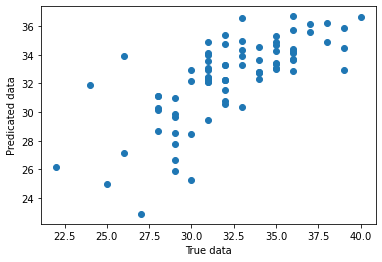

In [185]:

plt.scatter(Y_test,rig_pred)
plt.xlabel('True data')
plt.ylabel('Predicated data')

In [186]:
print(mean_squared_error(Y_test,rig_pred))
print(mean_absolute_error(Y_test,rig_pred))
print(np.sqrt(mean_squared_error(Y_test,rig_pred)))

6.302648315624643
1.987576420049285
2.510507581272091


In [187]:
score=r2_score(Y_test,rig_pred)
print(score)

0.5089107928505382


In [188]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.44666004828229655

In [189]:
# residuals
residuals1=Y_test-rig_pred

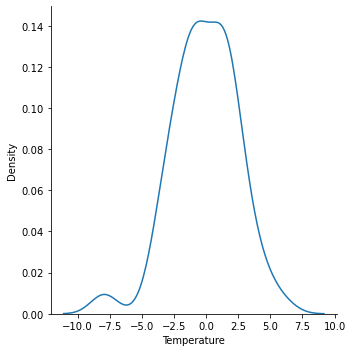

In [190]:
sns.displot(residuals1,kind="kde")

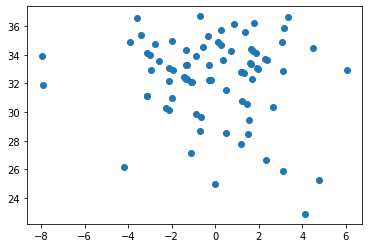

In [191]:
plt.scatter(residuals1,rig_pred)

In [192]:
### lasso

In [193]:
from sklearn.linear_model import Lasso

In [194]:
##Best alpha

###To figure out what alpha value is good for our model, we'll define multiple values and check the performance accuracy.

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train,Y_train)
    lasso_pred=lasso.predict(X_test)
    score=r2_score(Y_test,lasso_pred)
    MSE=mean_squared_error(Y_test,lasso_pred)
    MAE= mean_absolute_error(Y_test,lasso_pred)
    RMSE=np.sqrt(mean_squared_error(Y_test,lasso_pred))
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
          .format(a, score, MSE, RMSE))

Alpha:0.0001, R2:0.49, MSE:6.56, RMSE:2.56
Alpha:0.0010, R2:0.50, MSE:6.45, RMSE:2.54
Alpha:0.0100, R2:0.51, MSE:6.26, RMSE:2.50
Alpha:0.1000, R2:0.53, MSE:6.07, RMSE:2.46
Alpha:0.3000, R2:0.53, MSE:6.09, RMSE:2.47
Alpha:0.5000, R2:0.51, MSE:6.34, RMSE:2.52
Alpha:0.7000, R2:0.48, MSE:6.66, RMSE:2.58
Alpha:1.0000, R2:0.44, MSE:7.18, RMSE:2.68


In [195]:

lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [196]:
lasso.predict(X_test)

array([33.11804191, 34.30194807, 30.16555913, 33.56902435, 32.95756626,
       32.93946044, 31.11589498, 35.64580393, 31.05957158, 32.14472561,
       28.75328092, 34.18971944, 34.77958018, 34.44019282, 34.19310317,
       32.83376836, 33.84556281, 25.92332236, 32.21038325, 34.26467234,
       30.34069558, 28.46384044, 34.10472566, 28.58492083, 36.17963402,
       34.56420067, 32.95122297, 33.42477083, 26.09250855, 32.77312121,
       30.28213839, 32.12682272, 32.45561465, 33.41772232, 32.42913494,
       32.25695895, 30.96338375, 34.70887944, 26.69800826, 23.01141796,
       34.1857039 , 33.98081981, 34.91301225, 25.27534018, 36.1132842 ,
       32.29170629, 30.7917453 , 30.57724178, 33.71077832, 29.70631466,
       36.65184478, 34.92576191, 33.61635221, 34.61693433, 33.6488443 ,
       32.26399902, 32.30398214, 33.29051883, 32.08234977, 36.72763715,
       32.72004051, 29.85318675, 29.45918969, 36.59831064, 31.53051499,
       33.3257475 , 33.04655612, 33.86429756, 35.34639424, 25.04

In [197]:
lasso_pred = lasso.predict(X_test)

In [198]:
lasso_pred

array([33.11804191, 34.30194807, 30.16555913, 33.56902435, 32.95756626,
       32.93946044, 31.11589498, 35.64580393, 31.05957158, 32.14472561,
       28.75328092, 34.18971944, 34.77958018, 34.44019282, 34.19310317,
       32.83376836, 33.84556281, 25.92332236, 32.21038325, 34.26467234,
       30.34069558, 28.46384044, 34.10472566, 28.58492083, 36.17963402,
       34.56420067, 32.95122297, 33.42477083, 26.09250855, 32.77312121,
       30.28213839, 32.12682272, 32.45561465, 33.41772232, 32.42913494,
       32.25695895, 30.96338375, 34.70887944, 26.69800826, 23.01141796,
       34.1857039 , 33.98081981, 34.91301225, 25.27534018, 36.1132842 ,
       32.29170629, 30.7917453 , 30.57724178, 33.71077832, 29.70631466,
       36.65184478, 34.92576191, 33.61635221, 34.61693433, 33.6488443 ,
       32.26399902, 32.30398214, 33.29051883, 32.08234977, 36.72763715,
       32.72004051, 29.85318675, 29.45918969, 36.59831064, 31.53051499,
       33.3257475 , 33.04655612, 33.86429756, 35.34639424, 25.04

In [199]:
print(lasso.coef_)

[-1.21362572 -0.66684942  0.23820859  1.43048395  0.          0.46831561
  0.11053736 -0.         -0.04529573]


In [200]:
print(lasso.intercept_)

32.098765432098766


Text(0, 0.5, 'Predicated data')

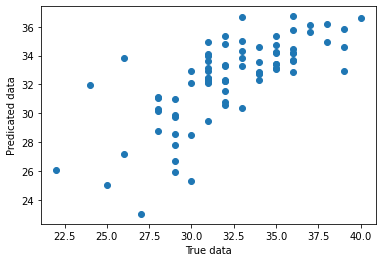

In [201]:

plt.scatter(Y_test,lasso_pred)
plt.xlabel('True data')
plt.ylabel('Predicated data')

In [202]:
print(mean_squared_error(Y_test,lasso_pred))
print(mean_absolute_error(Y_test,lasso_pred))
print(np.sqrt(mean_squared_error(Y_test,lasso_pred)))

6.263309366065417
1.9909700040470077
2.5026604576061486


In [203]:
score=r2_score(Y_test,lasso_pred)
print(score)

0.5119760017249158


In [204]:
###Adjusted R2 
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.45011380476046847

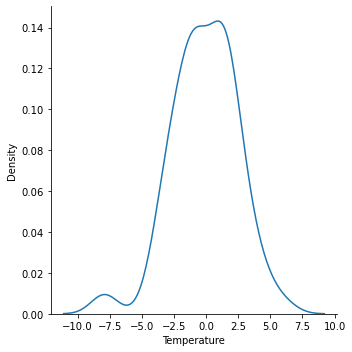

In [205]:
# residuals  and ploting kde plot
residuals1=Y_test-lasso_pred
sns.displot(residuals1,kind="kde")

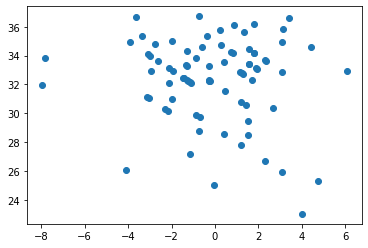

In [206]:
plt.scatter(residuals1,lasso_pred)


###  Elasticnet
### This program predicts the price
### Best valule of alpha has been foundout 

In [207]:
from sklearn.linear_model import ElasticNet

In [208]:
##Best alpha

###To figure out what alpha value is good for our model, we'll define multiple values and check the performance accuracy.

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    elasticnet = ElasticNet(alpha=a)
    elasticnet.fit(X_train,Y_train)
    elasticnet_pred=elasticnet.predict(X_test)
    score=r2_score(Y_test,elasticnet_pred)
    MSE=mean_squared_error(Y_test,elasticnet_pred)
    MAE= mean_absolute_error(Y_test,elasticnet_pred)
    RMSE=np.sqrt(mean_squared_error(Y_test,elasticnet_pred))
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
          .format(a, score, MSE, RMSE))

Alpha:0.0001, R2:0.49, MSE:6.55, RMSE:2.56
Alpha:0.0010, R2:0.50, MSE:6.42, RMSE:2.53
Alpha:0.0100, R2:0.51, MSE:6.27, RMSE:2.50
Alpha:0.1000, R2:0.53, MSE:6.03, RMSE:2.46
Alpha:0.3000, R2:0.54, MSE:5.93, RMSE:2.44
Alpha:0.5000, R2:0.53, MSE:6.03, RMSE:2.46
Alpha:0.7000, R2:0.51, MSE:6.23, RMSE:2.50
Alpha:1.0000, R2:0.48, MSE:6.65, RMSE:2.58


In [209]:
elasticnet = ElasticNet(alpha=0.01)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.01)

In [210]:
elasticnet_pred=elasticnet.predict(X_test)

In [211]:
elasticnet_pred

array([33.12256551, 34.31232842, 30.14284073, 33.6047171 , 32.94864388,
       32.94827515, 31.11942407, 35.61483871, 31.09581933, 32.1222685 ,
       28.7137231 , 34.28406077, 34.77772949, 34.38857921, 34.18068552,
       32.81734754, 33.88676705, 25.94154631, 32.21235468, 34.26359287,
       30.33529161, 28.47387167, 34.12115143, 28.56181919, 36.20268617,
       34.53535041, 32.95495762, 33.42643657, 26.14901209, 32.77039343,
       30.27604217, 32.13069482, 32.4459164 , 33.40772035, 32.41360157,
       32.24824764, 30.96842334, 34.69910522, 26.69565279, 22.95565681,
       34.21717499, 33.97783742, 34.91564632, 25.2781388 , 36.11513443,
       32.27978622, 30.76250071, 30.56865992, 33.6839057 , 29.68491138,
       36.57230206, 34.91349276, 33.61743931, 34.61693391, 33.66494577,
       32.30061978, 32.29118677, 33.27595347, 32.08103339, 36.70542147,
       32.70295812, 29.85713412, 29.44827576, 36.63726673, 31.52239171,
       33.30237297, 33.038592  , 33.87298436, 35.32391275, 25.03

In [212]:
print(elasticnet.coef_)
print(elasticnet.intercept_)

[-1.20591742 -0.67808171  0.24807878  1.40905052  0.01296053  0.52852859
  0.25444337 -0.         -0.21427808]
32.098765432098766


Text(0, 0.5, 'Predicated data')

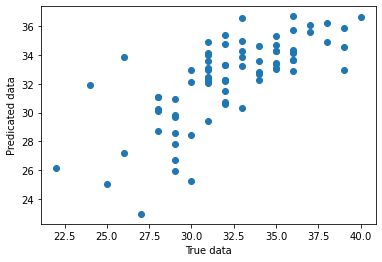

In [213]:

plt.scatter(Y_test,elasticnet_pred)
plt.xlabel('True data')
plt.ylabel('Predicated data')

In [214]:
print(mean_squared_error(Y_test,elasticnet_pred))
print(mean_absolute_error(Y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(Y_test,elasticnet_pred)))

6.273428721960275
1.990753056486659
2.5046813613632124


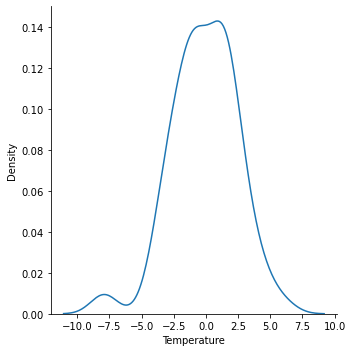

In [215]:
# residuals
residuals1=Y_test-elasticnet_pred
sns.displot(residuals1,kind="kde")

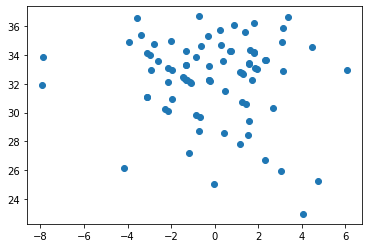

In [216]:
plt.scatter(residuals1,elasticnet_pred)